# Visualiser for dummy area28 metric data

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
df = pd.read_json("data.json")
df

,id,type,userId,sessionId,timestamp,data
0,1,CORE_SCENE_JOIN,1,1,2021-11-01 05:45:44,{}
1,2,CORE_SCENE_LEAVE,1,1,2021-11-01 05:46:39,{}
2,3,CORE_SCENE_JOIN,2,2,2021-11-01 05:45:41,{}
3,4,CORE_SCENE_LEAVE,2,2,2021-11-01 05:49:04,{}
4,5,CORE_SCENE_JOIN,3,3,2021-11-01 04:15:41,{}
5,6,CORE_SCENE_LEAVE,3,3,2021-11-01 04:17:45,{}
6,7,CORE_SCENE_JOIN,4,4,2021-11-01 04:35:41,{}
7,8,CORE_SCENE_LEAVE,4,4,2021-11-01 04:39:02,{}


In [82]:
df_processed = df[['userId']].copy()

times = df.groupby(['userId'])['timestamp'].diff().dropna()

df_processed['times'] = times
df_processed = df_processed.dropna()
df_processed

,userId,times
1,1,0 days 00:00:55
3,2,0 days 00:03:23
5,3,0 days 00:02:04
7,4,0 days 00:03:21


In [83]:
%matplotlib inline

<BarContainer object of 4 artists>

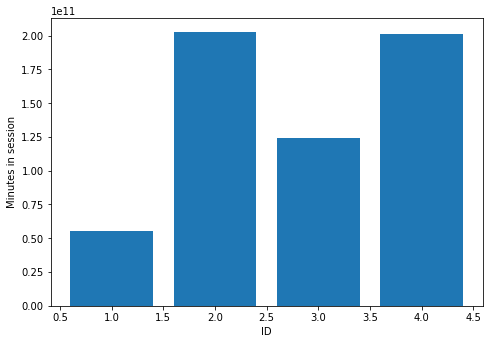

In [85]:
# df_processed.plot(x="userId", y=["times"])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Minutes in session')
ax.set_xlabel('ID')
ax.bar(df_processed['userId'], df_processed['times'])